<h1>SVM과 인공신경망</h1>

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# SVM

이진화된 당뇨 데이터 셋

In [2]:
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True,as_frame=True)
y = [ 'Neg' if y_numeric[i]<140 else 'Pos' for i in range(len(y_numeric)) ]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

다항 커널을 이용한 SVM



In [3]:
from sklearn.svm import SVC
f = SVC(C=5,kernel='poly',degree=3)
f.fit(xtrain,ytrain)

,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [4]:
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.8452830188679246 0.7570621468926554


RBF를 이용한 SVM

In [5]:
# parameter tuning
params = 10**np.linspace(-5,5,num=31)
acc_train = []; acc_cv = []; acc_test = []
for c in params:
    f = SVC(C=c,kernel='rbf',gamma='auto',random_state=0)
    f.fit(xtrain,ytrain)
    acc_train.append( f.score(xtrain,ytrain) )
    acc_cv.append( cross_val_score(f,xtrain,ytrain,cv=5).mean() )
    acc_test.append( f.score(xtest,ytest) )

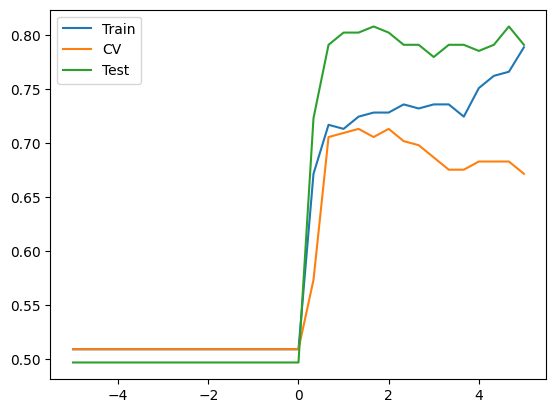

In [6]:
idx = np.log10(params)
plt.plot(idx,acc_train,idx,acc_cv,idx,acc_test)
plt.legend(['Train','CV','Test'])

In [7]:
from sklearn.model_selection import GridSearchCV
params = {'C': 10**np.linspace(-1,5,21),}
f = GridSearchCV( SVC(kernel='rbf',gamma='auto'), params )
f.fit(xtrain,ytrain)

,estimator,SVC(gamma='auto')
,param_grid,{'C': array([1.0000...00000000e+05])}
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,np.float64(12.589254117941675)


In [8]:
f.best_params_

{'C': np.float64(12.589254117941675)}

In [9]:
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.720754716981132 0.8022598870056498


# 인공신경망

이진화된 당뇨 데이터 셋

In [10]:
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True,as_frame=True)
y = [ 'Neg' if y_numeric[i]<140 else 'Pos' for i in range(len(y_numeric)) ]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

인공신경망 (분류 모델, 이진분류)

In [11]:
from sklearn.neural_network import MLPClassifier
f = MLPClassifier(
        hidden_layer_sizes = (2,2),
        activation = 'logistic',
        solver = 'lbfgs', # for small data set, sgd/adam for large data set
        alpha = 0.001, # L2 regularization
        batch_size = 'auto',
        learning_rate = 'constant',
        learning_rate_init = 0.001,
        random_state = 0,
        max_iter = 10000)

In [12]:
f.fit(xtrain,ytrain)

,hidden_layer_sizes,"(2, ...)"
,activation,'logistic'
,solver,'lbfgs'
,alpha,0.001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,10000
,shuffle,True
,random_state,0


In [13]:
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.5094339622641509 0.4971751412429379


In [14]:
f.coefs_

[array([[ 0.03984343,  0.17565562],
        [ 0.0839064 ,  0.03665243],
        [-0.06237327,  0.11898215],
        [-0.05098735,  0.31977102],
        [ 0.37856232, -0.09520096],
        [ 0.23818025,  0.02356312],
        [ 0.05558444,  0.347595  ],
        [-0.35026679, -0.33719646],
        [-0.39176645,  0.2714562 ],
        [ 0.22708623,  0.30202552]]),
 array([[-0.05313496,  0.39157514],
        [-0.53840243,  0.19298804]]),
 array([[0.13086647],
        [0.09060609]])]

In [15]:
f.intercepts_

[array([0.38992741, 0.24352371]),
 array([-0.50195794,  0.6201843 ]),
 array([-0.06750068])]

In [17]:
from sklearn.neural_network import MLPClassifier
f = MLPClassifier(
        hidden_layer_sizes = (10,5),
        activation = 'logistic',
        solver = 'lbfgs', # for small data set, sgd/adam for large data set
        alpha = 0.01, # L2 regularization
        batch_size = 'auto',
        learning_rate = 'constant',
        learning_rate_init = 0.001,
        random_state = 0,
        max_iter = 10000)
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

1.0 0.6892655367231638


인공신경망 (다중 분류)

In [18]:
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True,as_frame=True)
y = pd.cut(y_numeric,bins=3,labels=[1,2,3])
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [19]:
from sklearn.neural_network import MLPClassifier
f = MLPClassifier(
        hidden_layer_sizes = (2,2),
        activation = 'logistic',
        solver = 'lbfgs', # for small data set, sgd/adam for large data set
        alpha = 0.001, # L2 regularization
        batch_size = 'auto',
        learning_rate = 'constant',
        learning_rate_init = 0.001,
        random_state = 0,
        max_iter = 10000)
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.6867924528301886 0.6271186440677966


In [20]:
f.coefs_

[array([[-13.50027175, -15.02801894],
        [  1.20071846, -11.65150866],
        [ -0.70527205,  12.60206869],
        [ -4.00244442,  16.47119923],
        [ 11.14034062,  -9.0636562 ],
        [-11.08492311,  -5.73255354],
        [ 14.98461788,   7.20387167],
        [ -0.99701117,  10.45506066],
        [ 13.3707221 ,  24.45340199],
        [-23.82214719, -24.13922242]]),
 array([[ 38.29584531,  10.90623999],
        [-10.17304716, -30.54878772]]),
 array([[  7.36205773,   6.92927798, -14.37598795],
        [  8.72028477,  -0.26412554,  -8.37153987]])]

# 연습 문제

아래와 같이 MNIST 데이터 셋을 읽고 다음의 질문에 답하시오. MNIST 데이터 셋은 아래와 같이 읽도록 한다.
1. MNIST 데이터 셋의 샘플의 수는 몇 개인가? 총 변수의 수는 몇 개인가? 클래스의 수는 몇 개인가? : 1797개, 64개, 10개
2. MNIST 데이터의 훈련 데이터를 이용하여 SVM 모델을 훈련하고, 평가 데이터에서 성능을 측정하시오.
3. MNIST 데이터의 훈련 데이터를 이용하여 인공신경망 모델을 훈련하고, 평가 데이터에서 성능을 측정하시오.

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
set(y)

In [47]:
from sklearn.svm import SVC
f = SVC(C=5,kernel='poly',degree=3)
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

1.0 0.9902642559109874


In [49]:
from sklearn.neural_network import MLPClassifier
f = MLPClassifier(
        hidden_layer_sizes = (50,25,10),
        activation = 'logistic',
        solver = 'lbfgs', # for small data set, sgd/adam for large data set
        alpha = 0.001, # L2 regularization
        batch_size = 'auto',
        learning_rate = 'constant',
        learning_rate_init = 0.001,
        random_state = 0,
        max_iter = 10000)
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

1.0 0.9026425591098748


In [45]:
len(ytest)

719

In [42]:
ly=list(int(i) for i in ytrain)
counts=[ly.count(i) for i in range(10)]
print(counts)
print(max(counts))

[111, 110, 111, 112, 103, 99, 112, 108, 109, 103]
112


In [46]:
ly_t=list(int(i) for i in ytest)
counts_t=[ly_t.count(i) for i in range(10)]
print(counts_t)
print(max(counts_t))

[67, 72, 66, 71, 78, 83, 69, 71, 65, 77]
83
